# FBA FE HW1_ 김성한

## Problem 1

An investor deposits $15,000 in a bank today at 6% annual interest. Assuming that no additional deposits are made, and that no money is withdrawn, how large will the account balance be 23 years from today if<br/>
(a) the interest is computed using the simple interest convention?<br/>
(b) the interest is compounded annually?<br/>
(c) the interest is compounded quarterly?<br/>
(d) the interest is compounded monthly?<br/>
(e) the interest is compounded continuously?<br/>
(You should assume that the 6% annual interest rate applies to deposits of any length.)

In [2]:
import numpy as np

# (a) the interest is computed using the simple interest convention
a = 15000*(1+0.06*23)
print(a)
# (b) the interest is compounded annually
b = 15000*(1+0.06)**23
print(b)
# (c) the interest is compounded quarterly
c = 15000*(1+0.06/4)**(23*4)
print(c)
# (d) the interest is compounded monthly
d = 15000*(1+0.06/12)**(23*12)
print(d)
# (e) the interest is compounded continuously
e = 15000*(np.exp(0.06*23))
print(e)

35700.0
57296.24492359587
59015.64336415907
59418.858440729586
59623.52441242122


## Problem 2

If you buy a lottery ticket in 50 lotteries, in each of which your chances of winning a prize of 1/100, what is the probability that you will win a prize:

(a) at least once?<br/>
(b) exactly twice?<br/>
(c) at least twice?<br/>


Calculate both the exact probabilities (using the binomial distribution) and the approximate probabilities (using the Poisson distribution).

(a)
1. exact probability : $ P(X \geq 1) = 1 - _{50}C_0(\frac{1}{100})^{0}(\frac{99}{100})^{50}$

2. approximate probability : $ P(X \geq 1) = 1 - \frac{\lambda^0 e^{-\lambda}}{0!}$  $where$  $\lambda = np = \frac{1}{2} $

In [7]:
#(a)
## exact probability
a1 = 1 - (0.99)**50
print(a1)
## approximate probability
a2 = 1 - (np.exp(-0.5))
print(a2)

0.39499393286246365
0.3934693402873666


(b)
1. exact probability : $ P(X = 2) = _{50}C_2(\frac{1}{100})^{2}(\frac{99}{100})^{48}$

2. approximate probability : $ P(X = 2) = \frac{\lambda^2 e^{-\lambda}}{2!}$  $where$  $\lambda = np = \frac{1}{2} $

In [14]:
## Combination
import operator as op
from functools import reduce

def nCr(n, r):
    if n < 1 or r < 0 or n < r:
        raise ValueError
    r = min(r, n-r)
    numerator = reduce(op.mul, range(n, n-r, -1), 1)
    denominator = reduce(op.mul, range(1, r+1), 1)
    return numerator // denominator

#(b)
## exact probability
b1 = nCr(50, 2)*(0.99**48)*(0.01**2)
print(b1)
## approximate probability
b2 = (0.5**2)*(np.exp(-0.5))/2
print(b2)

0.07561804226543029
0.07581633246407918


(c)
1. exact probability : $ P(X \geq 2) = 1 - _{50}C_1(\frac{1}{100})^{1}(\frac{99}{100})^{49} - _{50}C_0(\frac{1}{100})^{0}(\frac{99}{100})^{50} $

2. approximate probability : $ P(X \geq 2) = 1 - \frac{\lambda e^{-\lambda}}{1!} - \frac{\lambda^0 e^{-\lambda}}{0!}$  $where$  $\lambda = np = \frac{1}{2} $

In [15]:
#(c)
## exact probability
c1 = 1 - (nCr(50, 1)*(0.99**49)*(0.01**1)) - (0.99**50)
print(c1)
## approximate probability
c2 = 1- (0.5*(np.exp(-0.5))) - np.exp(-0.5)
print(c2)

0.08943531309603114
0.09020401043104986


## Problem 3

Consider the following situation: $𝑌∼𝑁(μ,σ^2)$ $(𝑋∣𝑌=𝑦)∼𝑁(𝑦,v^2)$ We want to find the distribution of 𝑋.<br/>
(a) Find $𝑓_{𝑋𝑌}(𝑥,𝑦)$ and then use a Law of Total Probability to determine the distribution of 𝑋
$$𝑓_𝑋(𝑥)=∫𝑓_{𝑋|𝑌}( 𝑥 | 𝑦 )𝑓_𝑌(𝑦)𝑑𝑦 $$

$f_{XY} (x,y) = f_{X|Y}(x|y) f_Y (y) = \frac{1}{2\pi v\sigma}e^{-\frac{1}{2}((\frac{y-\mu}{\sigma})^2 + (\frac{x-y}{v})^2)}$

$f_X(x) = \int f_{X|Y} (x|y) f_Y (y) dy$

From now on, we will only look at the exponent term for the sake of simplicity

$-\frac{1}{2} (\frac{\sigma^2 + v^2}{\sigma^2 v^2}) y^2 + (\frac{x}{v^2} + \frac{\mu}{\sigma^2})y - \frac{x^2}{2v^2} - \frac{\mu^2}{2\sigma^2}$

Thinking of first two term, let $\tau = \frac{\sigma^2 v^2}{\sigma^2 + v^2} (x/v^2 + \mu/\sigma^2)$

$-\frac{1}{2} (\frac{y - \tau}{\frac{\sigma v}{\sqrt{\sigma^2 + v^2}}})^2 + \frac{\tau^2}{2} (\frac{\sigma^2 + v^2}{\sigma^2 v^2}) - \frac{x^2}{2v^2} - \frac{\mu^2}{2\sigma^2}$

When integrating first term multiplied with $\frac{1}{\sqrt{2\pi}} \frac{\sqrt{\sigma^2 + v^2}}{\sigma v}$ reduces to $1$

$\frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{\sigma^2 + v^2}}$ is the non-exponent part outside.

Inside the exponent part, $-\frac{1}{2 (\sigma^2 + v^2)} x^2 + \frac{1}{\sigma^2 + v^2}\mu x - \frac{1}{2(\sigma^2 + v^2)}\mu^2 = -\frac{1}{2(\sigma^2 + v^2)} (x - \mu)^2$

$X \sim \mathcal{N} (\mu, \sqrt{\sigma^2 + v^2})$

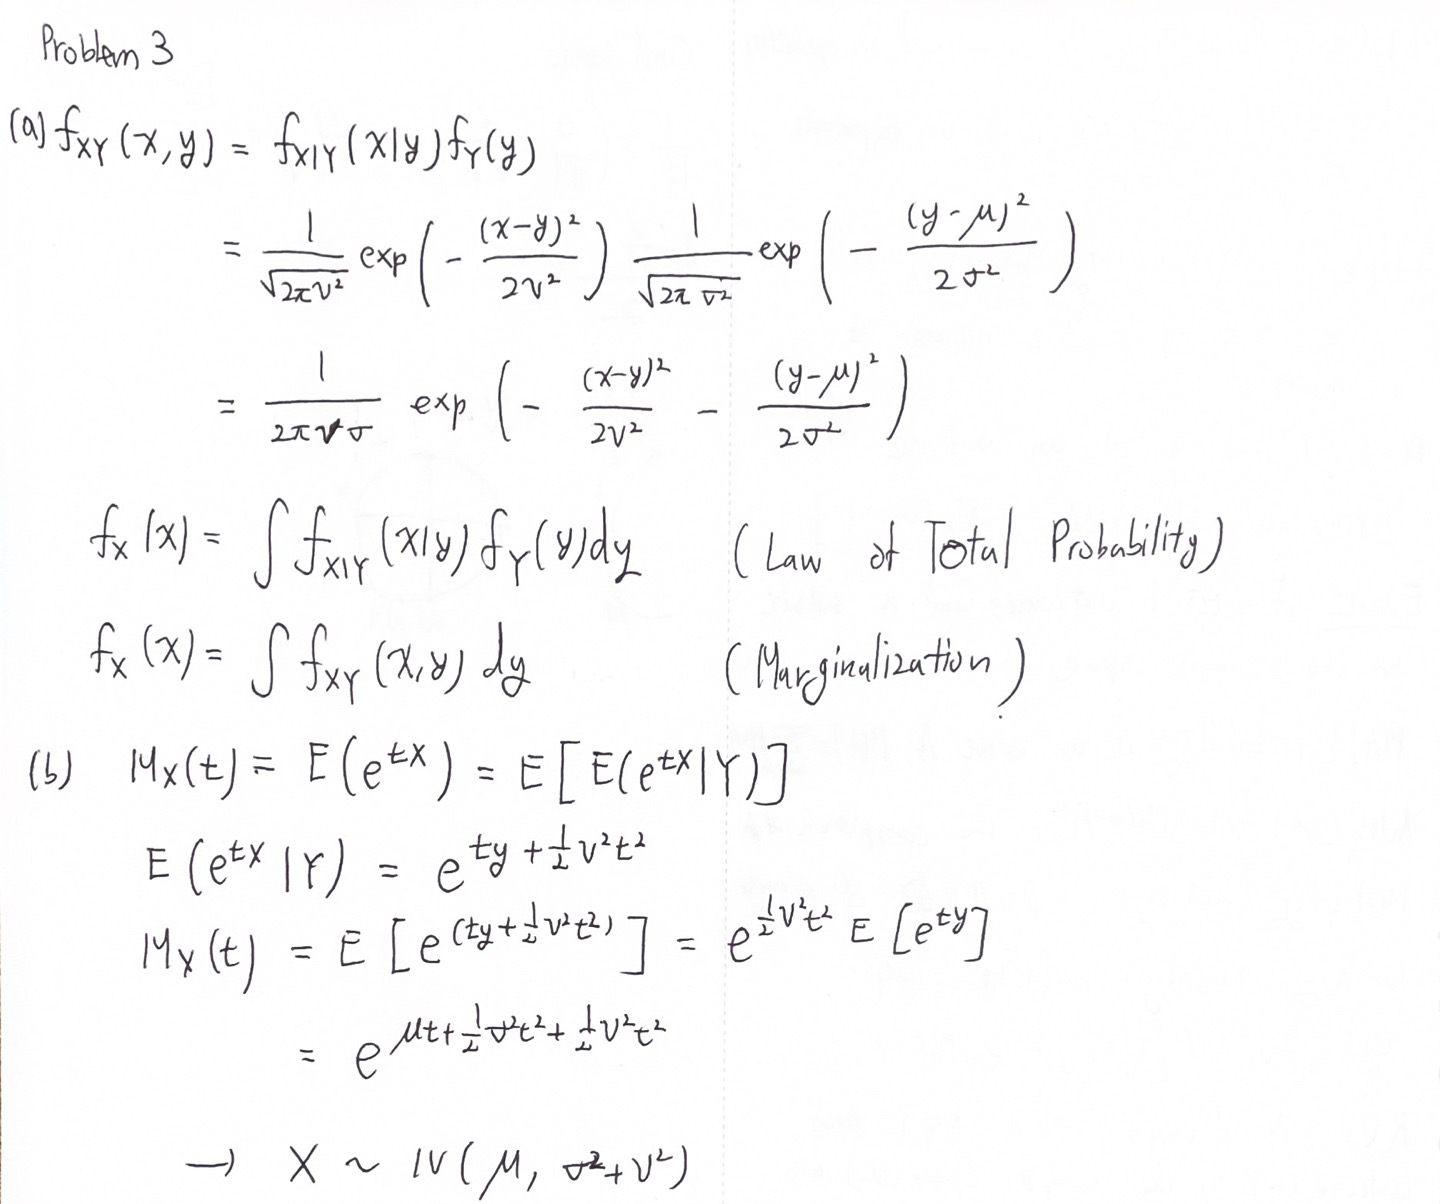

In [17]:
import PIL.Image as pilimg

p3 = pilimg.open('week2_p3.jpg')
p33 = np.array(p3)

p3

(b) Find the MGF $𝑀_𝑋(𝑡)$ and determine the distribution of 𝑋<br/>
$$𝑀_𝑋(𝑡)=𝐸(𝑒^{𝑡𝑋})=𝐸[𝐸(𝑒^{𝑡𝑋}∣𝑌)]$$
where the “inner” expected value, $𝐸(𝑒^{𝑡𝑋}∣𝑌)$ is the moment generating function of the random variable $(𝑋|𝑌=𝑦)$

$E(e^{tX} | Y) = exp(yt + v^2 t^2 /2)$

$E(e^{tX}) = \int \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} (\frac{y-\mu}{\sigma})^2} \times e^{yt + v^2 t^2 /2} dy$

it's now a time to only look at the exponent term

$-\frac{1}{2\sigma^2} y ^2 + (\mu/\sigma^2 + t) y - \frac{\mu^2}{2\sigma^2} + \frac{v^2 t^2}{2}$

$-\frac{1}{2\sigma^2} (y - (\mu + \sigma^2 t))^2 + \mu t + (\sigma^2 + v^2)t^2/2$

So entire mgf boils down to $X \sim \mathcal{N} (\mu, \sqrt{\sigma^2 + v^2})$

## Problem 4

Many people believe that the daily change of price of a company’s stock on the stock market is a random variable with mean 0 and variance $𝜎^2$. That is, if $𝑆_𝑡$ represents the price of the stock on the $𝑡$-th day, then $𝑆_𝑡=𝑆_𝑡−1+𝑊_𝑡, 𝑡≥1$
where $𝑊_1,𝑊_2,⋯,$ are independent and identically distributed random variables with mean 0 and variance $𝜎_2$. Suppose that the stock’s price today is 100 and $𝜎_2=1$.<br/>
(a) What can you say about the probability that the stock’s price will exceed 105 after 10 days? (Hint: Chebyshev inequality)

Let $W = \sum_{i=1}^{10} W_i$

From i.i.d. condition, we know that $E[W] = 0, Var[W] = 10$

Using Cantelli's ineq (one-sided version of Chebyshev ineq),

$Pr(W > 5) \leq \frac{10}{10 + 25} = 0.285$

(b) Suppose $𝑊_1,𝑊_2,⋯,$ are independent and identically distributed Normal random variables with mean 0 and variance $𝜎^2$. What is the probability that the stock’s price will exceed 105 after 10 days?

Note that sum of i.i.d. normal distribution follows $\mathcal{N}(\sum \mu_i, \sum \sigma_i^2)$

$Pr(\sum_{i=1}^{10} W_i > 5) = Pr(Z > 5/\sqrt{10}) = 1 - \Phi(5/\sqrt{10})$ where $Z$ is standard normal distribution

(c) Simulate $𝑀=10,000$ trajectories of the stock price $𝑆_𝑡$ for $𝑡=0,1,...,10.$ Plot 10 pairs of trajectories of the stock and calculate the probability that the stock’s price exceeds 105 after 10 days.

Approximately $0.0579$ for normal i.i.d.s

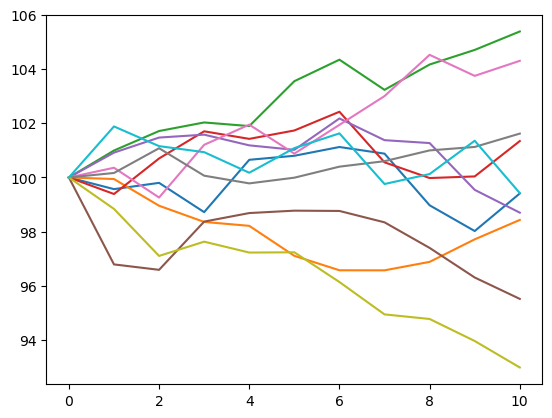

0.0579


In [11]:
from matplotlib import pyplot as plt
import numpy as np

exceeded = 0
total_num = 10000
for i in range(total_num):
    price_updowns = np.zeros(11)
    price_updowns[0] = 100
    price_updowns[1:] = np.random.standard_normal(10)
    price_trajectory = np.cumsum(price_updowns)
    if i % 1000 == 0:
        plt.plot(price_trajectory)
    if price_trajectory[-1] > 105:
        exceeded += 1
plt.show()
print(exceeded/total_num)


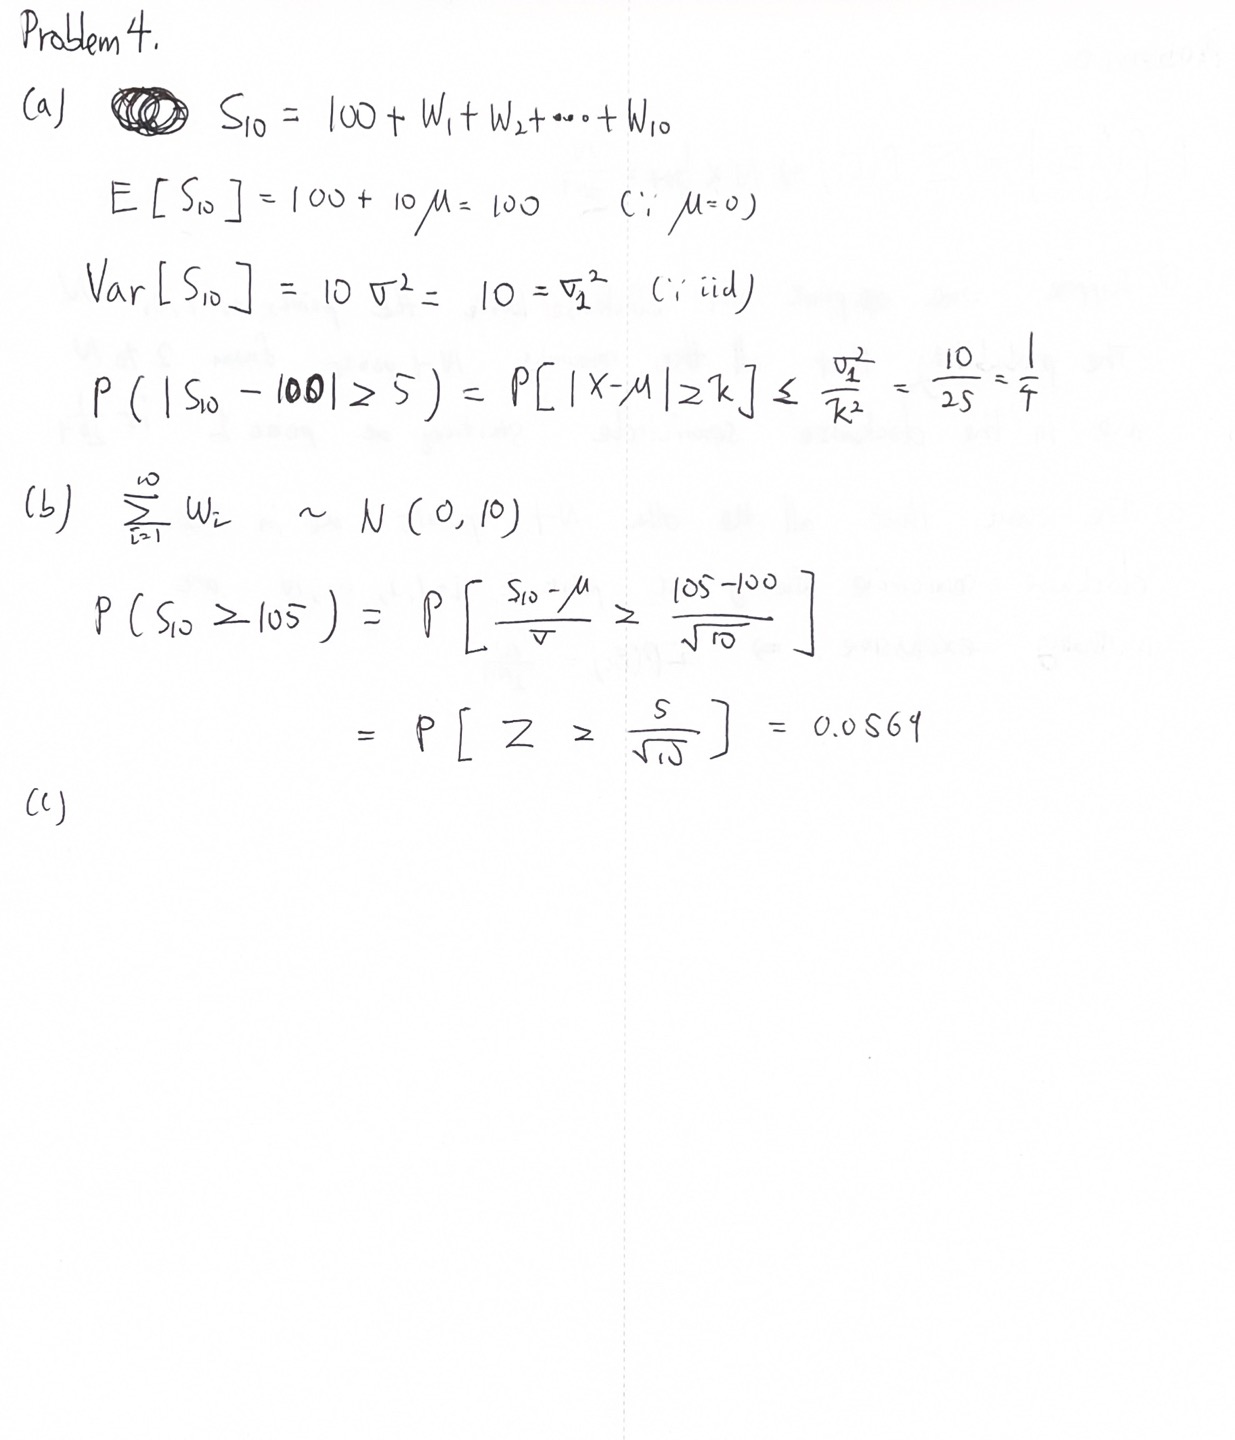

In [18]:
p4 = pilimg.open('week2_p4.jpg')
p44 = np.array(p4)

p4

## Problem 5

The IRR is generally calculated using an iterative procedure. Suppose that we define $𝑓(λ)=−𝑎_0+𝑎_1λ+𝑎_2λ^2+⋯+𝑎_𝑛λ^𝑛$, where all $𝑎_𝑖$ are positive and $𝑛>1$. Here is an iterative technique that generates a sequence $λ_0,λ_1,λ_2,…,λ_𝑘,…$ of estimates that converges to the root $λ̅>0$, solving $𝑓(λ̅)=0$. Start with any $λ_0>0$ close to the solution. Assuming $λ_𝑘$ has been calculated, evaluate $$𝑓′(λ_𝑘)=𝑎_1+2𝑎_2λ_𝑘+3𝑎_3λ_𝑘^2+⋯+𝑛𝑎_𝑛λ_𝑘^{𝑛−1}$$ 
and define $$λ_{𝑘+1}=λ_𝑘−\frac{𝑓(λ_𝑘)}{𝑓′(λ_𝑘)}$$
Try the procedure on $𝑓(λ)=−1+λ+λ^2$ starting with $λ_0=1$.<br/>
(a) Write a Python function to calculate $𝜆̅$ accurate up to 0.000001 and compute the computation time

In [14]:
import time

In [15]:
def f(_lambda):
    return -1+_lambda+_lambda**2
def derivativeF(_lambda):
    return 1+2*_lambda

_lambda = 1
precision = 0.000001
gradient = 1
start = time.time()
while(gradient>precision):
    gradient = f(_lambda)/derivativeF(_lambda)
    _lambda -= gradient
end = time.time()
print("result = {}, compuration time : {}".format(_lambda, (start-end)*1000))

result = 0.618033988749989, compuration time : 0.0


(b) Use the Bisection method to calculate $𝜆̅$ accurate up to 0.000001 and compare the computation time with the result from (a)

In [16]:
high = 1
low = 0
precision = 0.000001
start = time.time()
while(high-low>0.000001):
    mid = (high + low)/2
    if(f(mid)>0):
        high = mid
    elif(f(mid)<0):
        low = mid
    else:
        break
end = time.time()
print("result = {}, compuration time : {}".format((high+low)/2, (start-end)))

result = 0.6180338859558105, compuration time : 0.0


## Problem 6

Given N points drawn randomly on the circumference of a circle, what is the probability that they are all within a semicircle?

Since any point can form a semi circle, pick any. Circumference is now divided into two segments. It's either all one or the other for $n-1$ points, making the probability $(1/2)^{n-1}$. We can pick any points from $n$ points and all are disjoint so $n \times (1/2)^{n-1}$

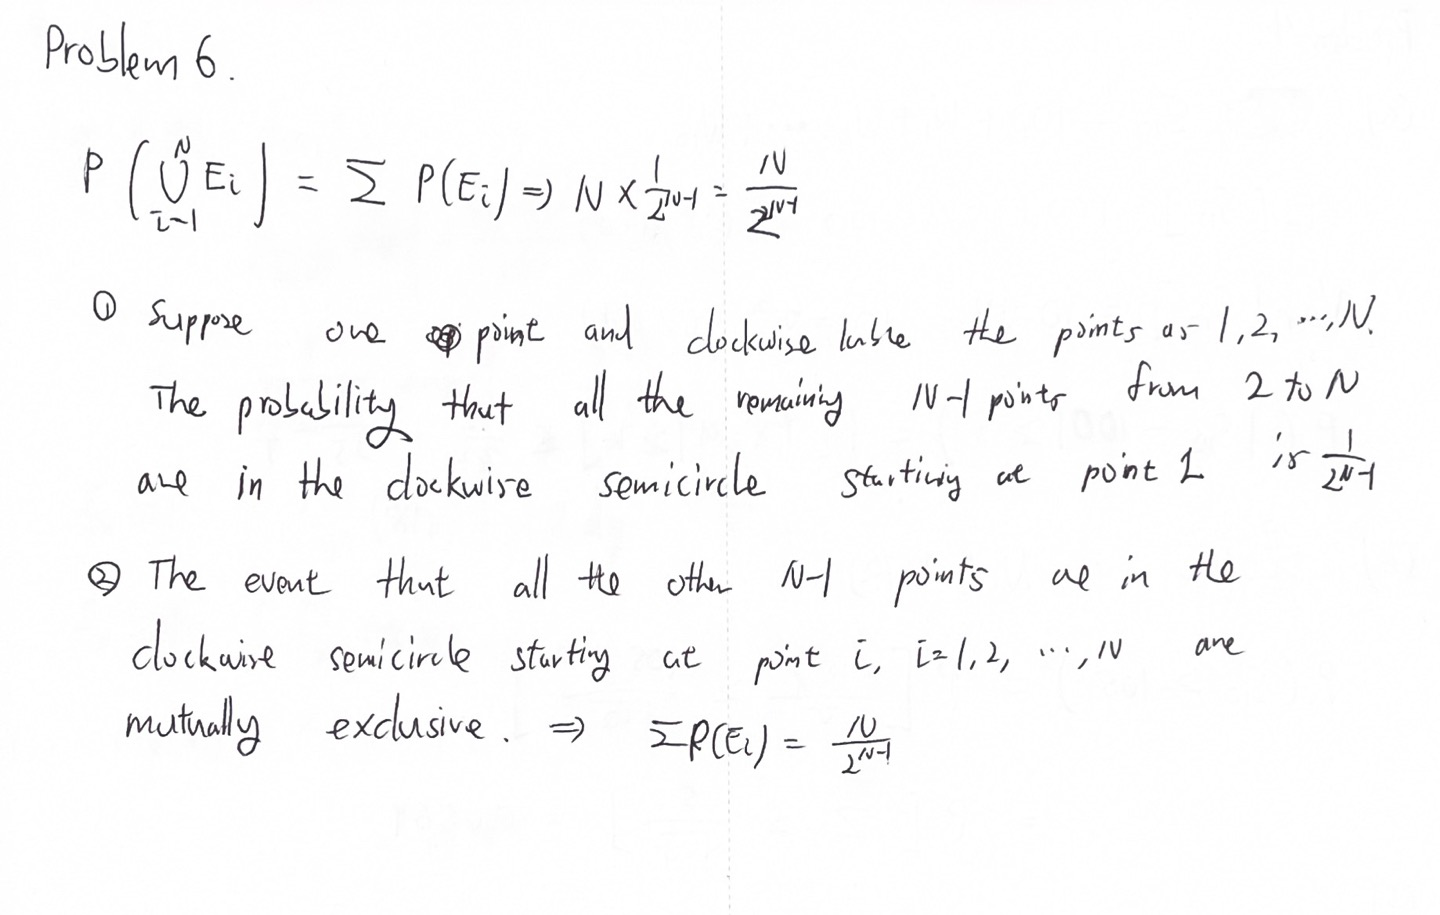

In [19]:
p6 = pilimg.open('week2_p6.jpg')
p66 = np.array(p6)

p6